 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning
In this section, you will need to Read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a DataFrame.
Files:
* whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.
* algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's Company
* sp500_csv: Contains historical closing prices of the S&P 500 Index.


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/whale_returns.csv"
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/algo_returns.csv"
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace = True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/sp500_history.csv"
sp500_history = pd.read_csv(sp500_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "", regex = True).astype("float")
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns ={'Close': 'sp500'},inplace=True)
sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

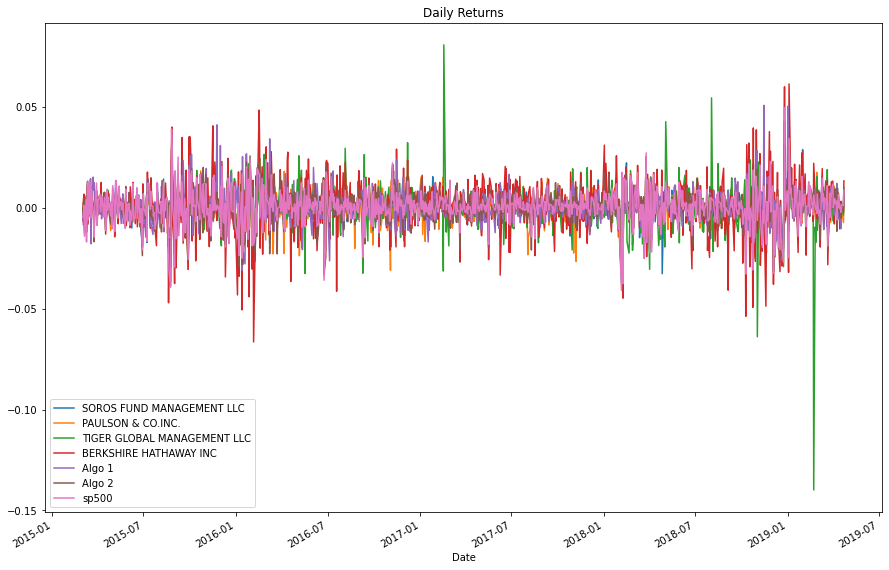

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(title='Daily Returns', figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

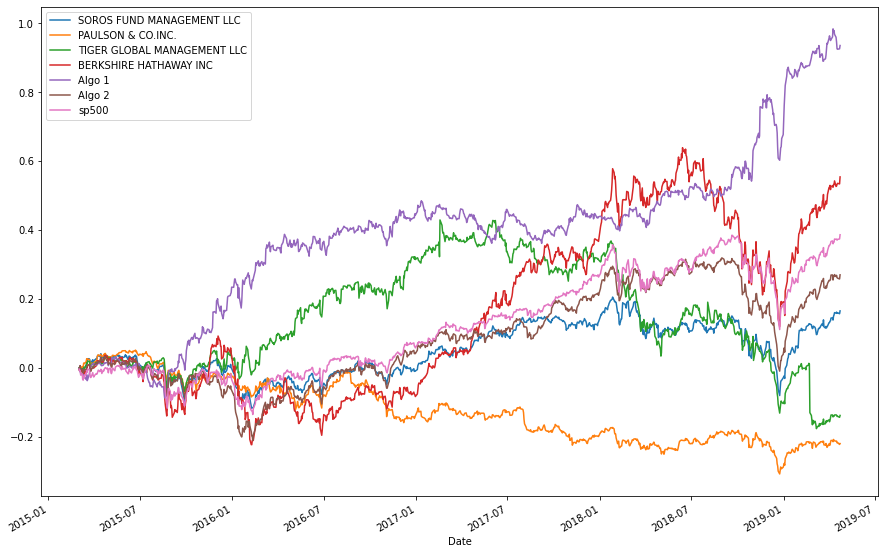

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

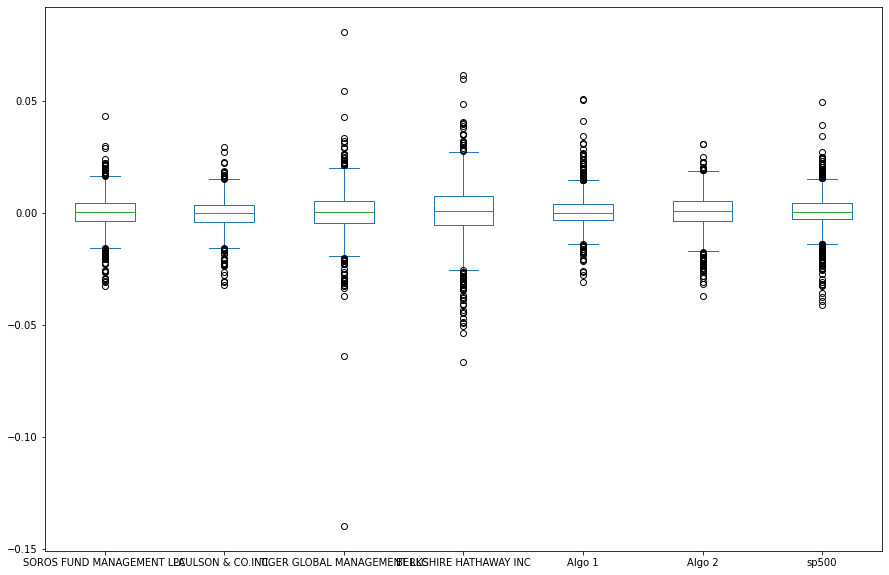

In [18]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (15,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
sp500_std = combined_df["sp500"].std()
combined_df.std() > sp500_std
# Tiger Global Management and Berkshire Hathaway are riskier than the S&P 500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_df = combined_df.std()*np.sqrt(252)
annual_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

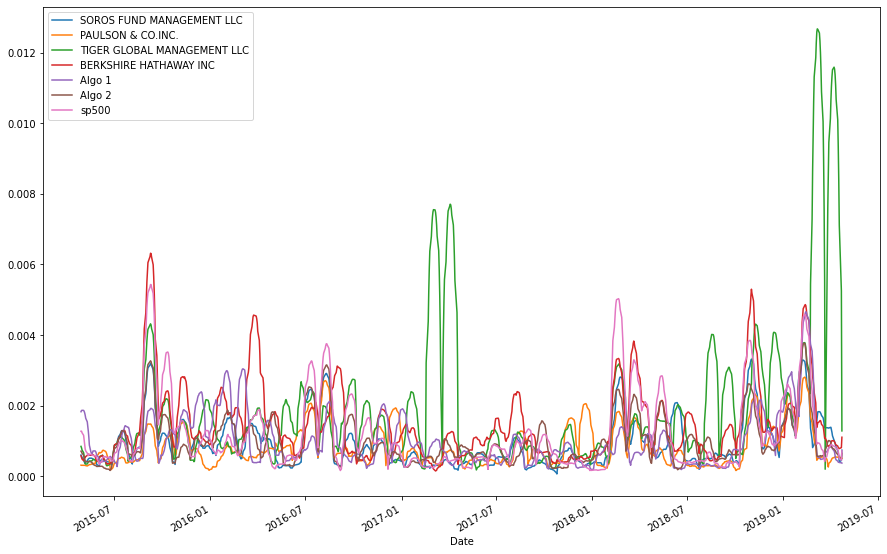

In [22]:
# Calculate the rolling standard deviation for all portfolio using a 21-day window
day21_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
day21_std.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

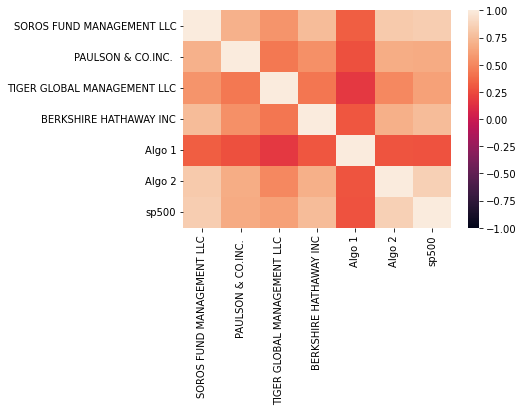

In [23]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

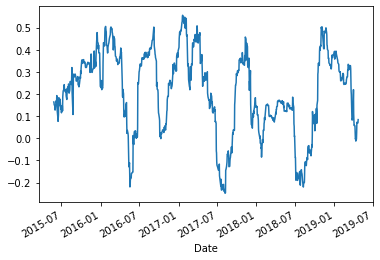

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['sp500'])
covariance
# Calculate variance of S&P 500
variance = combined_df['sp500'].rolling(window=60).var()
variance
# Computing beta
sp500_beta = covariance / variance
sp500_beta
# Plot beta trend
sp500_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

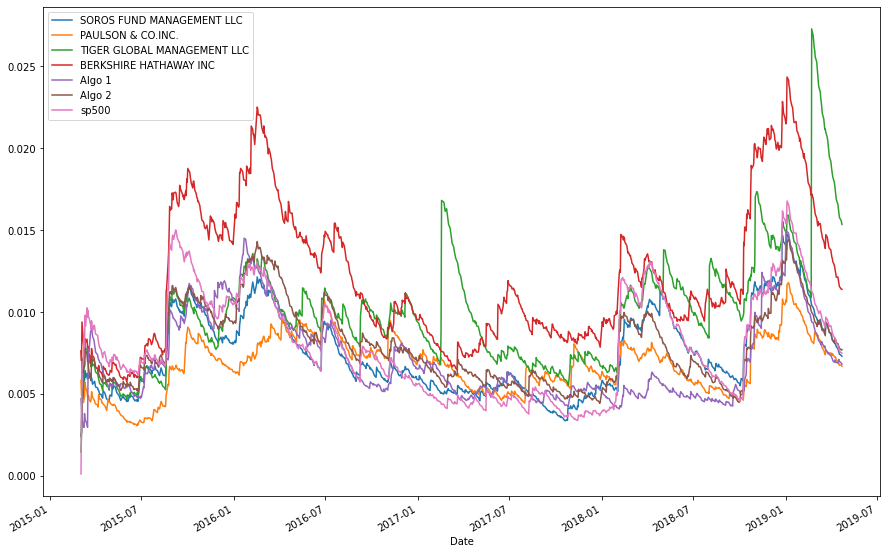

In [25]:
# Use `ewm` to calculate the rolling window
ewm_21 = combined_df.ewm(halflife=21).std()
ewm_21.plot(figsize=(15,10))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:>

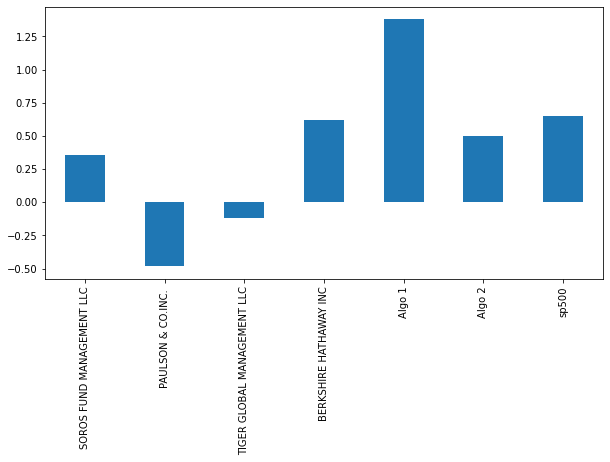

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Algo 1 outperforms both the S&P 500 and the whales portfolios.  Algo 2 was outperformed by the S&P 500 and the Berkshire Hathaway portfolio.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
google_historical_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/goog_historical.csv"
google_historical = pd.read_csv(google_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
google_historical.sort_index(ascending = True, inplace = True)
google_historical.rename(columns ={'Close': 'square'},inplace=True)
google_historical.head()

,Google
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [29]:
# Reading data from 2nd stock
apple_historical_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/aapl_historical.csv"
apple_historical = pd.read_csv(apple_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
apple_historical.sort_index(ascending = True, inplace = True)
apple_historical.rename(columns ={'Close': 'repligen'},inplace=True)
apple_historical.head()

,Apple
Date,
2018-05-11,47.15
2018-05-14,47.04
2018-05-15,46.61
2018-05-16,47.05
2018-05-17,46.75


In [30]:
# Reading data from 3rd stock
costco_historical_csv = "C:/Users/Margee/Pandas-homework/Starter_Code/Resources/cost_historical.csv"
costco_historical = pd.read_csv(costco_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
costco_historical.sort_index(ascending = True, inplace = True)
costco_historical.rename(columns ={'Close': 'walgreens'},inplace=True)
costco_historical.head()

,Costco
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [31]:
# Combine all stocks in a single DataFrame
margee_df = pd.concat([google_historical, apple_historical, costco_historical], axis="columns", join="inner")
margee_df.head()

,Google,Apple,Costco
Date,,,
2018-05-11,1098.26,47.15,195.76
2018-05-14,1100.20,47.04,195.88
2018-05-15,1079.23,46.61,195.48
2018-05-16,1081.77,47.05,198.71
2018-05-17,1078.59,46.75,199.60


In [32]:
# Reset Date index
 # margee_df.reset_index().head()
 # for my code I choose not to reset the index

In [33]:
# Reorganize portfolio data by having a column per symbol
margee_df.rename(columns ={'Google' : 'GOOGL', 'Apple' : 'APPL', 'Costco' : 'COST'},inplace=True)
margee_df.head()

,GOOGL,APPL,COST
Date,,,
2018-05-11,1098.26,47.15,195.76
2018-05-14,1100.20,47.04,195.88
2018-05-15,1079.23,46.61,195.48
2018-05-16,1081.77,47.05,198.71
2018-05-17,1078.59,46.75,199.60


In [34]:
# Calculate daily returns
margee_daily_returns = margee_df.pct_change()
margee_daily_returns.head()
# Drop NAs
margee_daily_returns.dropna(inplace = True)
# Display sample data
margee_daily_returns.head()

,GOOGL,APPL,COST
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009141,-0.002042
2018-05-16,0.002354,0.009440,0.016523
2018-05-17,-0.002940,-0.006376,0.004479
2018-05-18,-0.011339,-0.003636,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
portfolio_returns = margee_daily_returns.dot(weights)
  # portfolio_returns.rename('': 'Margee')
portfolio_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010081
2018-05-16    0.009439
2018-05-17   -0.001612
2018-05-18   -0.004992
dtype: float64

<AxesSubplot:xlabel='Date'>

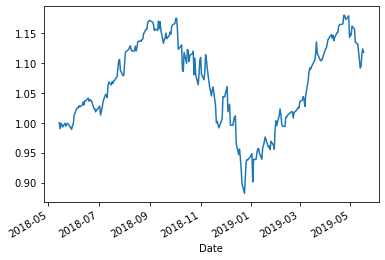

In [36]:
# Plot the cumulative portfolio returns
margee_cumulative_returns = (1 + portfolio_returns).cumprod()
margee_cumulative_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to portfthe original returns DataFrame
combined_df["custom_returns"] = portfolio_returns
#combined_returns_df = pd.concat([portfolio_returns, combined_df], axis="columns", join="inner")
#combined_returns_df.rename(columns ={'0': 'Margee'},inplace=True)
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,custom_returns
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010081
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009439
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001612
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.004992


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,custom_returns
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010081
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009439
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001612
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.004992


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
combined_returns_std = combined_df.std()*np.sqrt(252)
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500                          0.152054
custom_returns                 0.211470
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

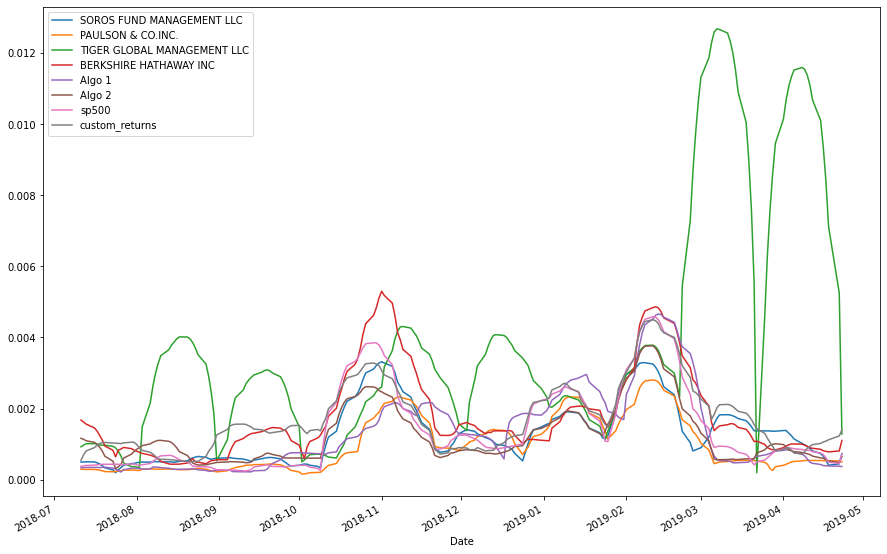

In [40]:
# Calculate rolling standard deviation
day21_combined_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
day21_combined_std.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

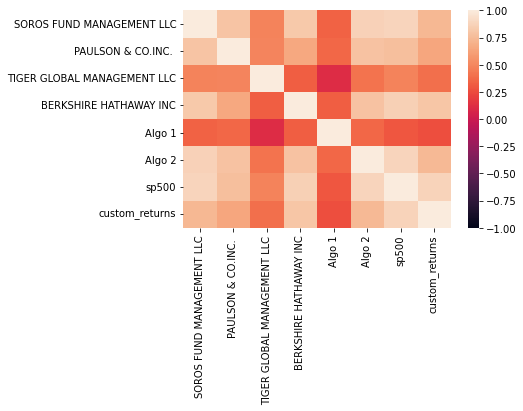

In [41]:
# Calculate and plot the correlation
price_correlation = combined_df.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

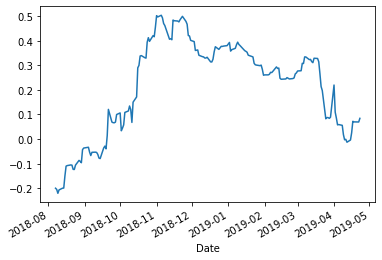

In [42]:
# Calculate and plot Beta
covariance_margee = combined_df['custom_returns'].rolling(window=60).cov(combined_df['sp500'])
covariance_margee
# Calculate variance of S&P 500
variance = combined_df['sp500'].rolling(window=60).var()
variance
# Computing beta
sp500_combined_beta = covariance / variance
sp500_combined_beta
# Plot beta trend
sp500_combined_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_combined = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios_combined

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500                          0.584820
custom_returns                 0.933207
dtype: float64

<AxesSubplot:>

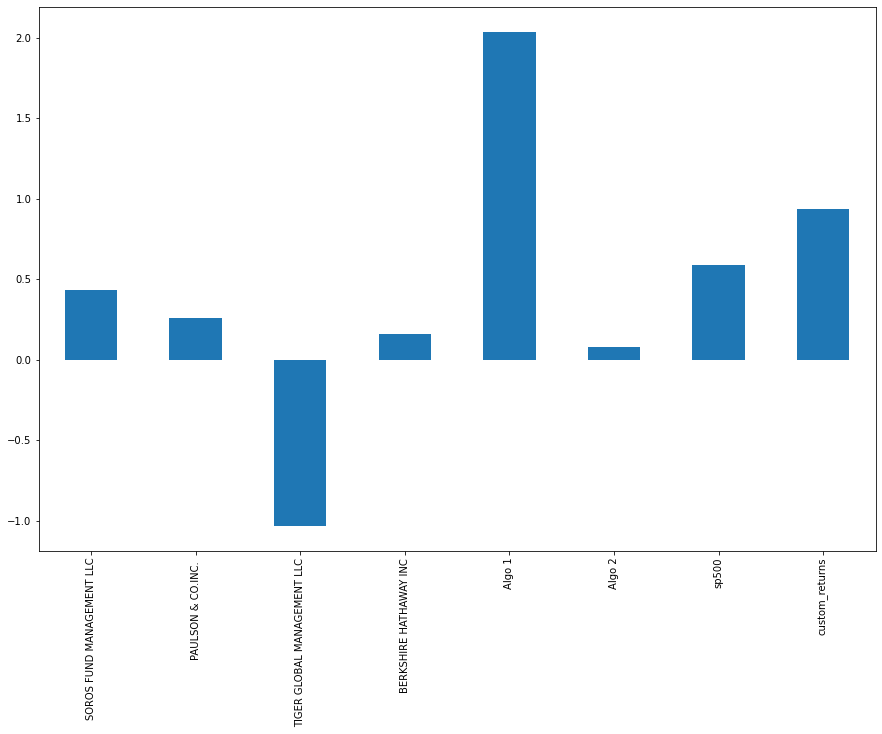

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot.bar(figsize=(15,10))

### How does your portfolio do?

Write your answer here!

The protfolio did pretty well, it performed better than all of the other portfolios including the s&p500.  The only portfolio that outperformed was the Algo 1 portfolio.